In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score,mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties
sns.set_theme(style='whitegrid')
import matplotlib.cm as cm
import matplotlib.colors as mcolors

In [2]:
sample_n = 100
is_search = False
total_days = 60
note = '1223&天数上限10&测试为下一天&sample_n'+str(sample_n)+'&is_search_'+str(is_search)

num_DiDi_lst = [10,20,30,40,50,60,70,80,90,100]
pro_Autonavi_lst = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
pro_Autonavi_lst = [round(i,3) for i in pro_Autonavi_lst]

In [3]:
df = pd.read_csv(f"/home/zzpeng/CycleCA/Learning/Performance/performance_1223&天数上限10&测试为下一天&sample_n100&is_search_False.csv",encoding='utf-8')
df['date'] = df['date'].astype(int)
df['MAPE'] = round(df['MAPE']*100, 3)
# df['n'] = df['n'].astype(int)
# df_autonavi = df[(df['Type'] == 'Autonavi') & (df['Pro'].isin(pro_Autonavi_lst))].copy()
# df_didi = df[(df['Type'] == 'DiDi') & (df['n'].isin(num_DiDi_lst))].copy()

## Day - MAPE

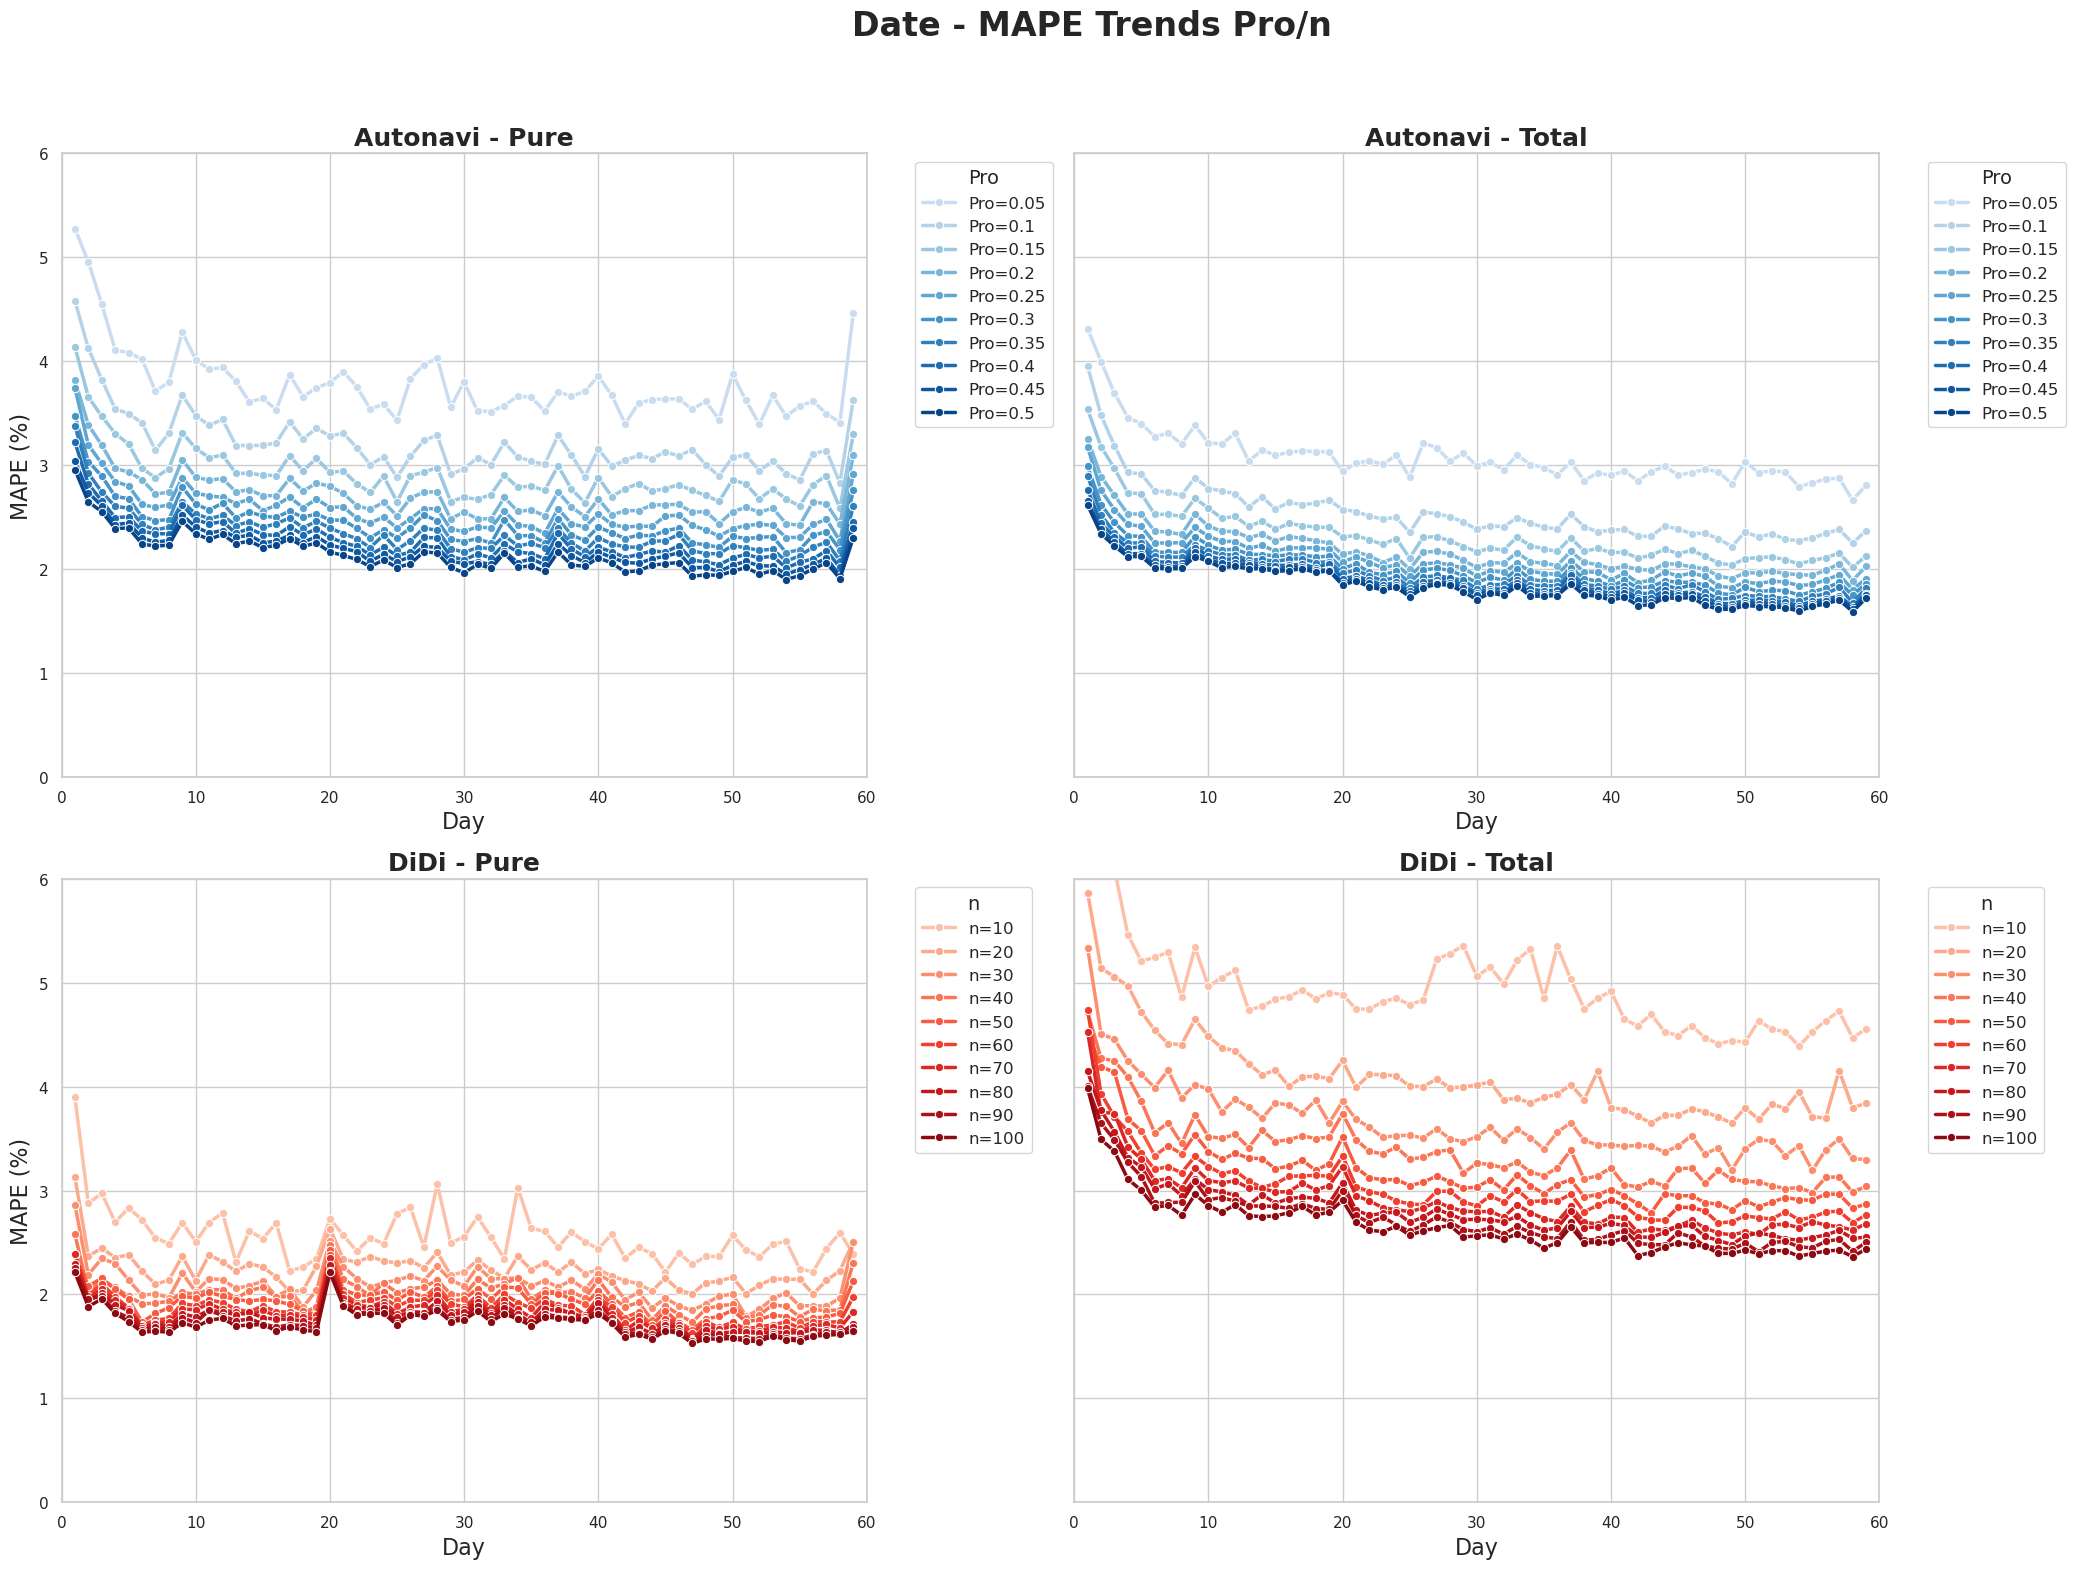

In [4]:
# 定义Type和Note的组合
types = ['Autonavi', 'DiDi']
notes = ['pure', 'total']

# 创建一个4个子图的图形（2x2网格）
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(22, 16), sharey=True)

# 统一Y轴范围
all_mape = df['MAPE']
y_min, y_max = all_mape.min() * 0.95, all_mape.max() * 1.05

# 定义深色系蓝色和红色调色板
def get_deep_palette(palette_name, n_colors, skip=2):
    """
    获取深色系调色板，跳过最浅的颜色。
    """
    palette = sns.color_palette(palette_name, n_colors + skip)[skip:]
    return palette[:n_colors]

# 为 Autonavi 的 Pro 和 Didi 的 n 分别生成颜色列表
colors_autonavi = get_deep_palette("Blues", len(pro_Autonavi_lst))
colors_didi = get_deep_palette("Reds", len(num_DiDi_lst))

# 创建字典以便于颜色分配
pro_to_color = dict(zip(sorted(pro_Autonavi_lst), colors_autonavi))
n_to_color = dict(zip(sorted(num_DiDi_lst), colors_didi))

# 遍历每种Type和Note的组合
for i, Type in enumerate(types):
    for j, Note in enumerate(notes):
        ax = axes[i, j]
        subset = df[(df['Type'] == Type) & (df['Note'] == Note)].copy()
        
        if Type == 'Autonavi':
            # 筛选指定的Pro值
            subset = subset[subset['Pro'].isin(pro_Autonavi_lst)]
            groups = subset.groupby('Pro')
            label_prefix = 'Pro='
            values_lst = sorted(pro_Autonavi_lst)
            color_dict = pro_to_color
        else:  # Type == 'Didi'
            # 筛选指定的n值
            subset = subset[subset['n'].isin(num_DiDi_lst)]
            groups = subset.groupby('n')
            label_prefix = 'n='
            values_lst = sorted(num_DiDi_lst)
            color_dict = n_to_color
        
        # 绘制每个组的MAPE随date变化的趋势线
        for val in values_lst:
            if val in groups.groups:
                group_data = groups.get_group(val).sort_values('date')
                sns.lineplot(
                    data=group_data,
                    x='date',
                    y='MAPE',
                    marker='o',
                    label=f'{label_prefix}{val}',
                    color=color_dict[val],
                    ax=ax,
                    linewidth=2.5
                )
            else:
                print(f'警告：{label_prefix}{val} 在 {Type} 数据中，Note={Note} 时不存在。')
        
        # 设置子图标题和标签
        ax.set_title(f'{Type} - {Note.capitalize()}', fontsize=18, weight='bold')
        ax.set_xlabel('Day', fontsize=16)
        if j == 0:
            ax.set_ylabel('MAPE (%)', fontsize=16)
        else:
            ax.set_ylabel('')
        
        # 设置图例，避免遮挡
        ax.legend(title=label_prefix[:-1], fontsize=12, title_fontsize=14,
                  bbox_to_anchor=(1.05, 1), loc='upper left')
        
        # 设置Y轴范围
        ax.set_ylim(0, 6)
        ax.set_xlim(0, 60)

# 添加整体标题
plt.suptitle('Date - MAPE Trends Pro/n', fontsize=24, weight='bold')

# 调整布局以避免重叠
plt.tight_layout(rect=[0, 0, 0.95, 0.95])

# 显示图形
plt.show()